# 1 The Half-edge Data Structure

In [1]:
from halfedge_mesh.halfedge_mesh import * #import a very lightweight package for half-edge data structures
%load_ext autoreload
%autoreload 2

### 1 Generate mesh for our cube

In [2]:
def create_halfedge_cube():
    ################### 1. Initialise ################################
    cube = HalfedgeMesh()
    cube.update_vertices([
        [-1, -1, -1], [-1, -1, 1], [-1, 1, 1], [-1, 1, -1],
        [1, -1, -1], [1, -1, 1], [1, 1, 1], [1, 1, -1]
    ])
    cube.facets = [Facet(index=i) for i in range(6)]
    cube.halfedges = [Halfedge(index=i) for i in range(24)]
    
    ################## 2. Define Halfedge Connectivity ################  
    # Back face
    cube.halfedges[0].update(vertex=cube.vertices[0], next=cube.halfedges[1], facet=cube.facets[0], opposite=cube.halfedges[10])
    cube.halfedges[1].update(vertex=cube.vertices[4], next=cube.halfedges[2], facet=cube.facets[0], opposite=cube.halfedges[19])
    cube.halfedges[2].update(vertex=cube.vertices[7], next=cube.halfedges[3], facet=cube.facets[0], opposite=cube.halfedges[12])
    cube.halfedges[3].update(vertex=cube.vertices[3], next=cube.halfedges[0], facet=cube.facets[0], opposite=cube.halfedges[21]) 
    # Front face
    cube.halfedges[4].update(vertex=cube.vertices[2], next=cube.halfedges[5], facet=cube.facets[1], opposite=cube.halfedges[14])
    cube.halfedges[5].update(vertex=cube.vertices[6], next=cube.halfedges[6], facet=cube.facets[1], opposite=cube.halfedges[17])
    cube.halfedges[6].update(vertex=cube.vertices[5], next=cube.halfedges[7], facet=cube.facets[1], opposite=cube.halfedges[8])
    cube.halfedges[7].update(vertex=cube.vertices[1], next=cube.halfedges[4], facet=cube.facets[1], opposite=cube.halfedges[23])
    # Bottom face
    cube.halfedges[8].update(vertex=cube.vertices[1], next=cube.halfedges[9], facet=cube.facets[2], opposite=cube.halfedges[6])
    cube.halfedges[9].update(vertex=cube.vertices[5], next=cube.halfedges[10], facet=cube.facets[2], opposite=cube.halfedges[16])
    cube.halfedges[10].update(vertex=cube.vertices[4], next=cube.halfedges[11], facet=cube.facets[2], opposite=cube.halfedges[0])
    cube.halfedges[11].update(vertex=cube.vertices[0], next=cube.halfedges[8], facet=cube.facets[2], opposite=cube.halfedges[20])
    # Top face
    cube.halfedges[12].update(vertex=cube.vertices[3], next=cube.halfedges[13], facet=cube.facets[3], opposite=cube.halfedges[2])
    cube.halfedges[13].update(vertex=cube.vertices[7], next=cube.halfedges[14], facet=cube.facets[3], opposite=cube.halfedges[18])
    cube.halfedges[14].update(vertex=cube.vertices[6], next=cube.halfedges[15], facet=cube.facets[3], opposite=cube.halfedges[4])
    cube.halfedges[15].update(vertex=cube.vertices[2], next=cube.halfedges[12], facet=cube.facets[3], opposite=cube.halfedges[22])
    # Right face
    cube.halfedges[16].update(vertex=cube.vertices[4], next=cube.halfedges[17], facet=cube.facets[4], opposite=cube.halfedges[9])
    cube.halfedges[17].update(vertex=cube.vertices[5], next=cube.halfedges[18], facet=cube.facets[4], opposite=cube.halfedges[5])
    cube.halfedges[18].update(vertex=cube.vertices[6], next=cube.halfedges[19], facet=cube.facets[4], opposite=cube.halfedges[13])
    cube.halfedges[19].update(vertex=cube.vertices[7], next=cube.halfedges[16], facet=cube.facets[4], opposite=cube.halfedges[1])
    # Left face
    cube.halfedges[20].update(vertex=cube.vertices[1], next=cube.halfedges[21], facet=cube.facets[5], opposite=cube.halfedges[11])
    cube.halfedges[21].update(vertex=cube.vertices[0], next=cube.halfedges[22], facet=cube.facets[5], opposite=cube.halfedges[3])
    cube.halfedges[22].update(vertex=cube.vertices[3], next=cube.halfedges[23], facet=cube.facets[5], opposite=cube.halfedges[15])
    cube.halfedges[23].update(vertex=cube.vertices[2], next=cube.halfedges[20], facet=cube.facets[5], opposite=cube.halfedges[7])

    ########## 3. Define Facet Connectivity ##############
    cube.facets[0].update(halfedge=cube.halfedges[0])
    cube.facets[1].update(halfedge=cube.halfedges[4])
    cube.facets[2].update(halfedge=cube.halfedges[8])
    cube.facets[3].update(halfedge=cube.halfedges[12])
    cube.facets[4].update(halfedge=cube.halfedges[16])
    cube.facets[5].update(halfedge=cube.halfedges[20])
    
    ########## 4. Define Vertex Connectivity ##############
    cube.vertices[0].update(halfedge=cube.halfedges[0])
    cube.vertices[1].update(halfedge=cube.halfedges[7])
    cube.vertices[2].update(halfedge=cube.halfedges[15])
    cube.vertices[3].update(halfedge=cube.halfedges[12])
    cube.vertices[4].update(halfedge=cube.halfedges[1])
    cube.vertices[5].update(halfedge=cube.halfedges[17])
    cube.vertices[6].update(halfedge=cube.halfedges[5])
    cube.vertices[7].update(halfedge=cube.halfedges[19])
    
    return cube

cube = create_halfedge_cube()
cube.flip()
cube.write_off('my_cube.off') #This converts the halfedge triangle into a .off file. Open it in Meshlab.

### 2

In [17]:
def calculate_centroid(face):
    """计算面的质心"""
    vertices = face.get_vertices()
    x = sum(vertex.x for vertex in vertices) / len(vertices)
    y = sum(vertex.y for vertex in vertices) / len(vertices)
    z = sum(vertex.z for vertex in vertices) / len(vertices)
    return [x, y, z]

## 解释一下facet.get_vertices()
## 就是先找到面对应的那个halfedge，然后通过不断调用next halfedge找到面所有的halfedge的起点，也就找到了面的所有vertices



### 3

In [18]:
def create_halfedge_tetrahedron():
    ################### 1. Initialise ################################
    
    tetra = HalfedgeMesh() #Create a halfedge-mesh object
    tetra.update_vertices([ [1,0,-2**(-0.5)], [-1,0,-2**(-0.5)], [0,1,2**(-0.5)] , [0,-1,2**(-0.5)]]) #Create vertices
    tetra.facets = [ Facet(index=i) for i in range(4) ] 
    tetra.halfedges = [ Halfedge(index = i) for i in range(12) ] 
    
    ################## 2. Define Halfedge Connectivity ################
    
    tetra.halfedges[0].update ( vertex = tetra.vertices[0], next = tetra.halfedges[1] , facet = tetra.facets[0] ,
                               opposite = tetra.halfedges[3] )
    
    tetra.halfedges[1].update ( vertex =  tetra.vertices[1], next = tetra.halfedges[2], facet = tetra.facets[0] ,
                               opposite = tetra.halfedges[5])
    
    tetra.halfedges[2].update ( vertex =  tetra.vertices[2], next = tetra.halfedges[0], facet = tetra.facets[0] ,
                              opposite = tetra.halfedges[4]) 
    
    tetra.halfedges[3].update ( vertex = tetra.vertices[1], next = tetra.halfedges[7], facet = tetra.facets[3] ,
                              opposite = tetra.halfedges[0])
    
    tetra.halfedges[4].update ( vertex = tetra.vertices[0], next = tetra.halfedges[6], facet = tetra.facets[1], 
                               opposite = tetra.halfedges[2] ) 
    
    tetra.halfedges[5].update ( vertex = tetra.vertices[2], next = tetra.halfedges[9], facet = tetra.facets[2],
                               opposite =  tetra.halfedges[1])
    
    tetra.halfedges[6].update ( vertex = tetra.vertices[2], next = tetra.halfedges[11] , facet = tetra.facets[1],
                               opposite =  tetra.halfedges[10])
    
    tetra.halfedges[7].update ( vertex = tetra.vertices[0], next = tetra.halfedges[8], facet = tetra.facets[3],
                               opposite =  tetra.halfedges[11])
    
    tetra.halfedges[8].update ( vertex = tetra.vertices[3], next = tetra.halfedges[3], facet = tetra.facets[3],
                               opposite = tetra.halfedges[9] )

    tetra.halfedges[9].update ( vertex = tetra.vertices[1], next = tetra.halfedges[10], facet = tetra.facets[2],
                               opposite = tetra.halfedges[8] )
    
    tetra.halfedges[10].update ( vertex = tetra.vertices[3], next = tetra.halfedges[5], facet = tetra.facets[2],
                                opposite =  tetra.halfedges[6])
    
    tetra.halfedges[11].update ( vertex = tetra.vertices[3], next = tetra.halfedges[4], facet = tetra.facets[1],
                                opposite = tetra.halfedges[7] )
    
    
    ########## 3. Define Facet Connectivity ##############
    
    tetra.facets[0].update (halfedge = tetra.halfedges[0])
    tetra.facets[1].update (halfedge = tetra.halfedges[6])
    tetra.facets[2].update (halfedge = tetra.halfedges[10])
    tetra.facets[3].update (halfedge = tetra.halfedges[7])

    ########## 4. Define Vertex Connectivity ##############

    tetra.vertices[0].update (halfedge = tetra.halfedges[0])
    tetra.vertices[1].update (halfedge = tetra.halfedges[1])
    tetra.vertices[2].update (halfedge = tetra.halfedges[2])
    tetra.vertices[3].update (halfedge = tetra.halfedges[8])

    return tetra

tetra = create_halfedge_tetrahedron()
tetra.write_off('my_tetrahedron.off') 

In [55]:
import numpy as np
import math

def calculate_original_mesh_centroid(original_mesh):
    # 初始化累加器
    sum_x = 0
    sum_y = 0
    sum_z = 0

    # 遍历所有顶点，累加它们的坐标
    for vertex in original_mesh.vertices:
        sum_x += vertex.x
        sum_y += vertex.y
        sum_z += vertex.z

    # 计算顶点的总数
    num_vertices = len(original_mesh.vertices)

    # 如果顶点总数大于0，则计算平均坐标
    if num_vertices > 0:
        centroid_x = sum_x / num_vertices
        centroid_y = sum_y / num_vertices
        centroid_z = sum_z / num_vertices
        # print(centroid_x, centroid_y, centroid_z)
        return np.array([centroid_x, centroid_y, centroid_z])
    else:
        # 如果网格中没有顶点，则返回原点作为质心
        return np.array([0, 0, 0])


def correct_halfedges_order(dual_facet, original_mesh_centroid):
    # 计算对偶面的质心
    dual_facet_centroid = calculate_centroid(dual_facet)

    # 获取对偶面的所有半边
    halfedges = []
    start_he = dual_facet.halfedge
    he = start_he
    while True:
        halfedges.append(he)
        he = he.next
        if he == start_he:
            break

    # 计算从对偶面质心到原网格质心的向量
    to_original_centroid_vector = original_mesh_centroid - dual_facet_centroid

    # 计算第一个半边的法线和向量的点乘
    first_he_normal = dual_facet.get_normal()
    dot_product = np.dot(first_he_normal, to_original_centroid_vector)

    # 如果点乘小于0，反转半边的顺序
    if dot_product > 0:
        halfedges.reverse()

        # 重新设置每个半边的next和prev属性
        for i, he in enumerate(halfedges):
            next_index = (i + 1) % len(halfedges)
            prev_index = (i - 1 + len(halfedges)) % len(halfedges)
            he.next = halfedges[next_index]
            he.prev = halfedges[prev_index]

        # 更新对偶面的halfedge为反转后的第一个半边
        dual_facet.halfedge = halfedges[0]


def compute_dual_mesh(original_mesh):
    dual_vertices = []  # 对偶图的顶点列表
    dual_halfedges = []  # 对偶图的半边列表
    dual_facets = []  # 对偶图的面列表

    # 为原始网格的每个面创建一个对偶顶点
    for facet in original_mesh.facets:
        center = calculate_centroid(facet)  # 计算质心
        dual_vertex = Vertex(center[0], center[1], center[2], len(dual_vertices))
        dual_vertices.append(dual_vertex)
        
    
    # 为原始网格的每个顶点创建一个对偶面，并创建对偶半边
    for vertex in original_mesh.vertices:
        he_map = {}
        new_facet = Facet(index=vertex.index)  # 创建对偶面
        dual_facets.append(new_facet)

        # 找到以该顶点为起点的所有半边
        start_halfedges = [he for he in original_mesh.halfedges if he.vertex == vertex]
        first_dual_he = None  # 用于闭合循环，连接最后一个和第一个对偶半边

        # 为每个半边创建对偶半边，并设置其next和prev关系
        for i, he in enumerate(start_halfedges):
            if he.facet and he.opposite and he.opposite.facet:
                dual_start_vertex = dual_vertices[he.facet.index]
                dual_end_vertex = dual_vertices[he.opposite.facet.index]

                dual_he = Halfedge(vertex=dual_start_vertex, facet=new_facet)
                dual_halfedges.append(dual_he)
                # 将起始顶点和结束顶点的组合映射到对偶半边
                he_map[(dual_start_vertex.index, dual_end_vertex.index)] = dual_he

                # 为对偶顶点设置halfedge属性
                if not dual_start_vertex.halfedge:
                    dual_start_vertex.halfedge = dual_he
                if not new_facet.halfedge:
                    new_facet.halfedge = dual_he  # 设置对偶面的第一个半边
        # print(len(dual_halfedges))
        # 遍历映射表，设置每个半边的next和prev属性
        for (start_idx, end_idx), he in he_map.items():
            # print((start_idx, end_idx))
            # 查找所有可能的候选半边，它们以当前半边的结束顶点为起始顶点
            candidates = [he_candidate for (s_idx, _), he_candidate in he_map.items() if s_idx == end_idx]

            # 从候选中选择一个作为next_he
            # 这里的选择逻辑可能需要根据你的具体情况来定
            next_he = True
            for candidate in candidates:
                next_he = False
                he.next = candidate
                candidate.prev = he
                break
            if next_he :
                print("wtf")

            
        # 修正为顺时针方向
        correct_halfedges_order(new_facet, calculate_original_mesh_centroid(original_mesh))
        # print("123")


    # 为每个对偶半边设置opposite属性
    for he in dual_halfedges:
        for candidate in dual_halfedges:
            if he.vertex == candidate.next.vertex and he.next.vertex == candidate.vertex:
                he.opposite = candidate
                candidate.opposite = he
                break

    dual_mesh = HalfedgeMesh(vertices=dual_vertices, halfedges=dual_halfedges, facets=dual_facets)
    
    return dual_mesh



# 试了下tetra怎么再对偶都没问题呀
dual_cube = compute_dual_mesh(cube)
dual_cube.write_off('my_dual_cube1.off')
dual_cube1 = compute_dual_mesh(dual_cube)
print(len(dual_cube1.facets))
print("asd")
# 这里对偶再对偶，就不对了，看了下是面的输出不是按顺序来而是开始交错了，说明沿着he往下找的时候开始出错了
# 现在对了
dual_cube1.write_off('my_dual_cube2.off') #This converts the halfedge triangle into a .off file. Open it in Meshlab.


6
asd


## Task 2: ICP

### 2.1

In [2]:
import sys,os

RES_PATH = 'bunny_v2'
if not os.path.exists(RES_PATH):
    print( 'cannot find /resources, please update RES_PATH')
    exit(1)
else:
    print('found resources')

import pyglet
pyglet.options['shadow_window'] = False
import pyrender
import numpy as np
import trimesh
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('default')
import open3d as o3d
import time
from scipy.spatial import KDTree
from scipy.sparse import diags
from scipy.sparse.linalg import svds

found resources


d:\Anaconda\envs\godzilla\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [7]:
RES_PATH = 'bunny_v2'  # 请替换为实际路径

mesh_src = os.path.join(RES_PATH, 'bun000_v2.ply')
assert os.path.exists(mesh_src), 'cannot found:' + mesh_src
mesh1 = o3d.io.read_triangle_mesh(mesh_src)

# 这里换成90，用了git上的库也不行hiahia
mesh_dst = os.path.join(RES_PATH, 'bun045_v2.ply')
assert os.path.exists(mesh_dst), 'cannot found:' + mesh_dst
mesh2 = o3d.io.read_triangle_mesh(mesh_dst)

points_A = np.asarray(mesh1.vertices)
points_B = np.asarray(mesh2.vertices)

def visualize_iteration(src, dst, threshold=1e-2):
    # 这里吧threshold=1e-4调大可以显著看上去更厉害
    # 将 numpy 数组转换为 Open3D 点云
    src_pcd = o3d.geometry.PointCloud()
    src_pcd.points = o3d.utility.Vector3dVector(src)
    src_pcd.paint_uniform_color([1, 0, 0])  # 红色表示 meshA

    dst_pcd = o3d.geometry.PointCloud()
    dst_pcd.points = o3d.utility.Vector3dVector(dst)
    dst_pcd.paint_uniform_color([0, 0, 1])  # 蓝色表示 meshB

    # 创建 KD 树来查找最近点对
    src_tree = KDTree(src)
    dst_tree = KDTree(dst)

    # 查找两个点云中每个点的最近邻居并计算距离
    distances_src_to_dst, indices_src_to_dst = src_tree.query(dst)
    distances_dst_to_src, indices_dst_to_src = dst_tree.query(src)

    # 根据距离阈值标记重叠区域的点为绿色
    for i, distance in enumerate(distances_src_to_dst):
        if distance < threshold:  # 如果距离小于阈值，则视为重叠区域
            dst_pcd.colors[i] = [0, 1, 0]  # 绿色

    for i, distance in enumerate(distances_dst_to_src):
        if distance < threshold:
            src_pcd.colors[i] = [0, 1, 0]  # 绿色

    # 可视化点云
    o3d.visualization.draw_geometries([src_pcd, dst_pcd])


def best_fit_transform(A, B, weights=None):
    assert len(A) == len(B)

    if weights is None:
        weights = np.ones(len(A))

    centroid_A = np.average(A, axis=0, weights=weights)
    centroid_B = np.average(B, axis=0, weights=weights)

    AA = A - centroid_A
    BB = B - centroid_B

    # 直接应用权重，避免创建大的对角矩阵
    # AA_weighted = AA * weights[:, np.newaxis]
    # pdf 貌似说不需要加权重？
    # 不是，是说需要推导有w的话，下面的东东怎么算，写出推导！
    # 不是用chatgpt给的，用知乎链接自己加上w，非常easy啊https://zhuanlan.zhihu.com/p/104735380
    AA_weighted = AA
    H = AA_weighted.T @ BB

    U, S, Vt = np.linalg.svd(H)
    R = Vt.T @ U.T
    if np.linalg.det(R) < 0:
        Vt[2, :] *= -1
        R = Vt.T @ U.T
    t = centroid_B.T - R @ centroid_A.T
    t = t.reshape(-1, 1)
    return R, t

def icp(src, dst, max_iterations=100, tolerance=1e-4):
    # 这个tolerance之前是0.001，我把它调整的0.00005 / 0.0001这么小之后，显著改进了结果
    # 感觉rotate修正问题中，这个一定要调整的特别小，当我试图用0.001的时候，我一度以为我写错了，改成0.00005才正常全重叠
    # 我感觉这里可以加一个条件，如果dis总和小于多少也停止
    start_time = time.time()
    prev_error = np.inf
    tree = KDTree(dst)

    for i in range(max_iterations):
        # 在dst建的树中，查询最近的几个点
        distances, indices = tree.query(src, k = 1)
        # 越近权重越大？说明越信任这个点
        # 本来写得1 / 。。。 但是发现这样写收敛的更快
        weights = (distances + 1e-6)
        
        T = best_fit_transform(src, dst[indices], weights=weights)
        # 使用np.dot进行就地旋转，然后就地添加平移
        np.dot(src, T[0].T, out=src)  # 就地旋转src
        src += T[1].T  # 就地添加平移
        
        mean_error = np.mean(distances)
        sum_srror = np.sum(distances)
        if np.abs(prev_error - mean_error) < tolerance:
            break
        prev_error = mean_error
        # 可视化每次迭代的对齐效果（可选）
        # visualize_iteration(src, dst)

    # T = best_fit_transform(src, src_cp, weights=weights)
    total_time = time.time() - start_time
    return i, total_time, mean_error

iterations, time_total, mean_error = icp(points_B, points_A)
print(f" Iterations: {iterations}, time:{time_total}, mean_error:{mean_error}")
# 应用ICP变换到第二个网格
# mesh2.transform(np.vstack((np.hstack((R, t)), [0, 0, 0, 1])))

visualize_iteration(points_A, points_B)

# 可视化对齐后的网格
o3d.visualization.draw_geometries([mesh1, mesh2])
aligned_mesh_path = os.path.join(RES_PATH, 'bun045_v2_aligned.ply')
combined_mesh = mesh1 + mesh2  # 合并网格
o3d.io.write_triangle_mesh(aligned_mesh_path, combined_mesh)  # 保存合并后的网格


 Iterations: 8, time:5.410417318344116, mean_error:0.0018598443938289513


True

### 2.2

In [4]:
def clone_mesh(mesh):
    # 创建一个新的 TriangleMesh 对象
    cloned_mesh = o3d.geometry.TriangleMesh()
    
    # 将原网格的顶点和面复制给新网格
    cloned_mesh.vertices = o3d.utility.Vector3dVector(np.asarray(mesh.vertices))
    cloned_mesh.triangles = o3d.utility.Vector3iVector(np.asarray(mesh.triangles))
    
    # 如果原网格有顶点颜色和法线，也复制它们
    if mesh.has_vertex_colors():
        cloned_mesh.vertex_colors = o3d.utility.Vector3dVector(np.asarray(mesh.vertex_colors))
    if mesh.has_vertex_normals():
        cloned_mesh.vertex_normals = o3d.utility.Vector3dVector(np.asarray(mesh.vertex_normals))
    
    return cloned_mesh


#### calculate rorate turb

In [21]:
import copy

def rotate_mesh(mesh, angle, axis='z'):
    angle_rad = np.radians(angle)
    copy_mesh = clone_mesh(mesh)
    
    # 根据角度和轴生成旋转矩阵
    if axis == 'z':
        R = o3d.geometry.get_rotation_matrix_from_axis_angle([0, 0, angle_rad])
    elif axis == 'y':
        R = o3d.geometry.get_rotation_matrix_from_axis_angle([0, angle_rad , 0])
    elif axis == 'x':
        R = o3d.geometry.get_rotation_matrix_from_axis_angle([angle_rad, 0, 0])
    else:
        raise ValueError("Axis must be 'x', 'y', or 'z'")
    
    # 应用旋转
    copy_mesh.rotate(R, (0, 0, 0))
    return copy_mesh


# 评估旋转扰动
def evaluate_rotation(mesh, angles):
    rotation_results = []
    
    for angle in angles:
        # 应用旋转扰动
        rotated_mesh = rotate_mesh(mesh, angle)
        rotated_points = np.asarray(rotated_mesh.vertices)
        points =  np.asarray(mesh.vertices)
        
        # 使用ICP算法对齐
        iterations, total_time, mean_error = icp(rotated_points, points)
        visualize_iteration(np.asarray(rotated_mesh.vertices), np.asarray(mesh.vertices))
        
        # aligned_mesh_path = os.path.join(RES_PATH, 'zxc.ply')
        # combined_mesh = rotated_mesh + mesh  # 合并网格
        # o3d.io.write_triangle_mesh(aligned_mesh_path, combined_mesh)  # 保存合并后的网格

        print(f"Angle: {angle} degrees, Mean error: {mean_error}, Iterations: {iterations}, time:{total_time}")
        rotation_results.append((angle, mean_error, iterations, total_time))
        
        del rotated_mesh # 释放内存
        
    return rotation_results



# 示例角度和噪声级别
angles = [0, 5, 10, 15, 20, 25, 30]

# 调用评估函数
rotation_data = evaluate_rotation(mesh1, angles)

Angle: 0 degrees, Mean error: 2.0506390421834487e-17, Iterations: 1, time:0.1252899169921875
Angle: 5 degrees, Mean error: 0.0005169232970595079, Iterations: 8, time:0.8450014591217041
Angle: 10 degrees, Mean error: 0.0005283601477261675, Iterations: 11, time:1.2788779735565186
Angle: 15 degrees, Mean error: 0.0005476774148761764, Iterations: 12, time:1.5672166347503662
Angle: 20 degrees, Mean error: 0.0005504324757959595, Iterations: 13, time:2.033198356628418
Angle: 25 degrees, Mean error: 0.0005548950706498226, Iterations: 14, time:2.560694456100464
Angle: 30 degrees, Mean error: 0.0005842808150952362, Iterations: 15, time:3.1483428478240967


#### calculate noise turb

In [6]:
def add_noise(mesh, noise_level):
    copy_mesh = clone_mesh(mesh)
    # 获取网格的边界盒尺寸
    bounding_box = copy_mesh.get_axis_aligned_bounding_box()
    extent = bounding_box.get_extent()
    max_extent = np.max(extent)
    
    # 计算噪声标准差
    sigma = noise_level * max_extent
    # 向每个顶点添加高斯噪声
    vertices = np.asarray(copy_mesh.vertices)
    noise = np.random.normal(0, sigma, vertices.shape)
    copy_mesh.vertices = o3d.utility.Vector3dVector(vertices + noise)
    return copy_mesh


# 评估添加噪声
def evaluate_noise(mesh, noise_levels):
    noise_results = []
    
    for noise_level in noise_levels:
        # 添加噪声扰动
        noisy_mesh = add_noise(mesh, noise_level)
        points =  np.asarray(mesh.vertices)
        noisy_points = np.asarray(noisy_mesh.vertices)
        visualize_iteration(np.asarray(noisy_mesh.vertices), np.asarray(mesh.vertices))
        
        # 使用ICP算法对齐
        iterations, total_time, mean_error = icp(noisy_points, points)
        
        # 可视化点
        visualize_iteration(np.asarray(noisy_mesh.vertices), np.asarray(mesh.vertices))
        # 可视化mesh
        o3d.visualization.draw_geometries([noisy_mesh, mesh])
        
        print(f"Noise level: {noise_level}, Mean error: {mean_error}, Iterations: {iterations}, time:{total_time}")
        noise_results.append((noise_level, mean_error, iterations, total_time))
    return noise_results


# 示例角度和噪声级别
noise_levels = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05]

# 调用评估函数
noise_data = evaluate_noise(mesh1, noise_levels)



Noise level: 0.0, Mean error: 2.0506390421834487e-17, Iterations: 1, time:0.2230381965637207
Noise level: 0.01, Mean error: 0.0013101763731191887, Iterations: 1, time:0.41103291511535645
Noise level: 0.02, Mean error: 0.0024958391809677145, Iterations: 1, time:0.5881574153900146
Noise level: 0.03, Mean error: 0.003698190299988786, Iterations: 1, time:0.672144889831543
Noise level: 0.04, Mean error: 0.00487260688961299, Iterations: 1, time:0.886676549911499
Noise level: 0.05, Mean error: 0.006125508259648833, Iterations: 1, time:1.169245719909668


上面的iteration都是1，我感觉是因为我icp循环里设置了比较前后两次的error，因为这里每次循环的error没办法减小的，就会这样，你要说是不是应该这样，我不知道哇呜呜

这里ite = 1说不定说明写得好啊，说明算法不会被扰动干扰到，但我也不确定

#### plot

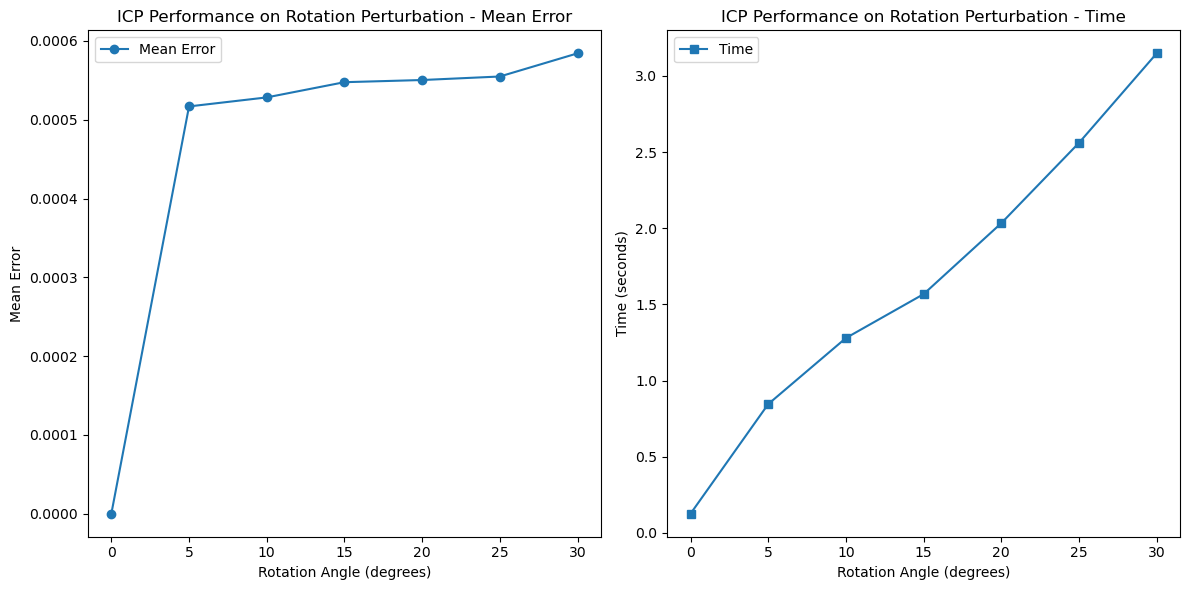

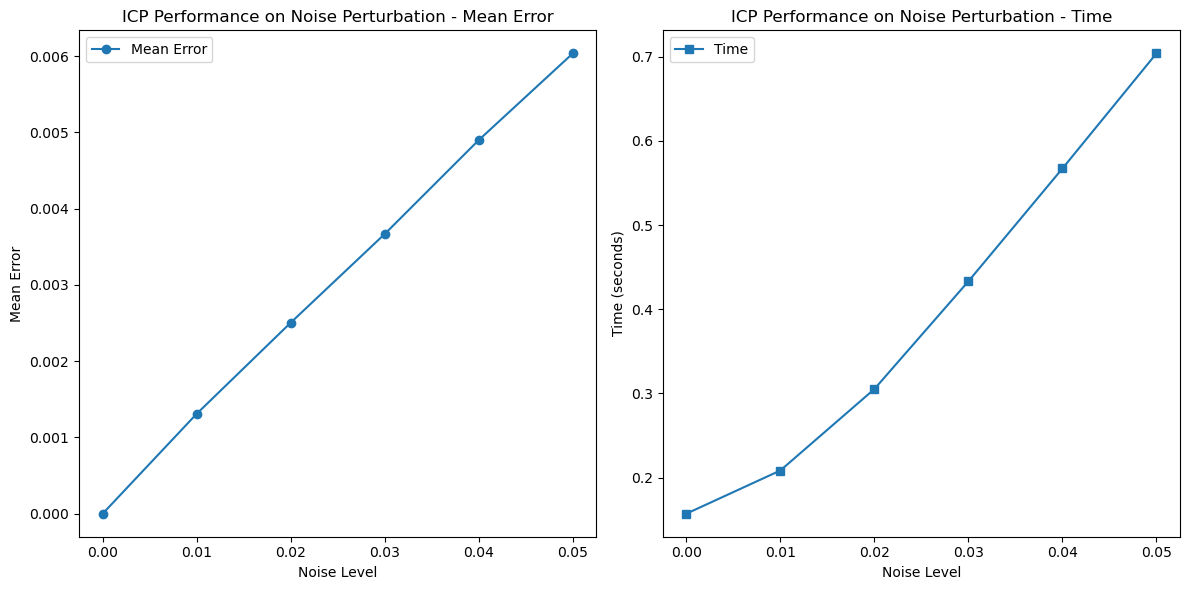

In [24]:
# 解包评估数据
angles_evaluated, mean_errors_rotation, iterations_rotation, times_rotation = zip(*rotation_data)
noise_evaluated, mean_errors_noise, iterations_noise, times_noise = zip(*noise_data)

# 绘制旋转扰动结果
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(angles_evaluated, mean_errors_rotation, 'o-', label='Mean Error')
plt.xlabel('Rotation Angle (degrees)')
plt.ylabel('Mean Error')
plt.title('ICP Performance on Rotation Perturbation - Mean Error')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(angles_evaluated, times_rotation, 's-', label='Time')
plt.xlabel('Rotation Angle (degrees)')
plt.ylabel('Time (seconds)')
plt.title('ICP Performance on Rotation Perturbation - Time')
plt.legend()

plt.tight_layout()
plt.show()

# 绘制噪声扰动结果
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(noise_evaluated, mean_errors_noise, 'o-', label='Mean Error')
plt.xlabel('Noise Level')
plt.ylabel('Mean Error')
plt.title('ICP Performance on Noise Perturbation - Mean Error')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(noise_evaluated, times_noise, 's-', label='Time')
plt.xlabel('Noise Level')
plt.ylabel('Time (seconds)')
plt.title('ICP Performance on Noise Perturbation - Time')
plt.legend()

plt.tight_layout()
plt.show()


### 2.3

In [25]:
mesh_src = os.path.join(RES_PATH, 'bun000_v2.ply')
assert os.path.exists(mesh_src), 'cannot found:' + mesh_src
mesh1 = o3d.io.read_triangle_mesh(mesh_src)

mesh_dst = os.path.join(RES_PATH, 'bun045_v2.ply')
assert os.path.exists(mesh_dst), 'cannot found:' + mesh_dst
mesh2 = o3d.io.read_triangle_mesh(mesh_dst)

points_A = np.asarray(mesh1.vertices)
points_B = np.asarray(mesh2.vertices)

In [78]:
def icp_sub(src, dst, src_o, dst_o, max_iterations=100, tolerance=1e-4):
    # 这个tolerance之前是0.001，我把它调整的0.00005 / 0.0001这么小之后，显著改进了结果
    # 感觉rotate修正问题中，这个一定要调整的特别小，当我试图用0.001的时候，我一度以为我写错了，改成0.00005才正常全重叠
    # 我感觉这里可以加一个条件，如果dis总和小于多少也停止
    start_time = time.time()
    prev_error = np.inf
    tree = KDTree(dst)

    for i in range(max_iterations):
        # 在dst建的树中，查询最近的几个点
        distances, indices = tree.query(src, k = 1)
        # 越近权重越大？说明越信任这个点
        # 本来写得1 / 。。。 但是发现这样写收敛的更快
        weights = (distances + 1e-6)
        
        T = best_fit_transform(src, dst[indices], weights=weights)
        # 使用np.dot进行就地旋转，然后就地添加平移
        np.dot(src, T[0].T, out=src)  # 就地旋转src
        src += T[1].T  # 就地添加平移
        
        np.dot(src_o, T[0].T, out=src_o)  # 就地旋转src_o
        src_o += T[1].T  # 就地添加平移
        
        mean_error = np.mean(distances)
        sum_srror = np.sum(distances)
        if np.abs(prev_error - mean_error) < tolerance:
            break
        prev_error = mean_error
        # 可视化每次迭代的对齐效果（可选）
        # visualize_iteration(src, dst)

    # T = best_fit_transform(src, src_cp, weights=weights)
    total_time = time.time() - start_time
    return i, total_time, mean_error

In [14]:
def random_subsampling(points, fraction):
    """
    对点云进行随机子采样
    points: 点云数据
    fraction: 子采样的比例，0 < fraction <= 1
    """
    if fraction <= 0 or fraction > 1:
        raise ValueError("Fraction must be within (0, 1].")

    selected_indices = np.random.choice(len(points), size=int(len(points) * fraction), replace=False)
    # 直接在原数组上修改，只保留选中的点
    return points[selected_indices]

# 评估降采样
def evaluate_subsample(mesh1, mesh2, fractions):
    subsample_results = []
    for fraction in fractions:
        copy_mesh1 = clone_mesh(mesh1)
        copy_mesh2 = clone_mesh(mesh2)
        points_A = np.asarray(copy_mesh1.vertices)
        points_B = np.asarray(copy_mesh2.vertices)
        # visualize_iteration(points_A, points_B)
        # 这里是全新的点
        subsampled_points_A = random_subsampling(points_A, fraction)
        subsampled_points_B = random_subsampling(points_B, fraction)
        
        # 使用ICP算法对齐
        # 前面的参与计算，后面的只负责跟着变换
        iterations, total_time, mean_error = icp_sub(subsampled_points_B, subsampled_points_A, points_B, points_A)
        visualize_iteration(np.asarray(copy_mesh2.vertices), np.asarray(copy_mesh1.vertices))

        print(f"Fraction: {fraction} degrees, Mean error: {mean_error}, Iterations: {iterations}, time:{total_time}")
        subsample_results.append((fraction, mean_error, iterations, total_time))
        
    return subsample_results
    

In [80]:
# 示例使用随机子采样对齐两个网格
subsample_fractions = [1, 0.5, 0.25, 0.1, 0.05, 0.01]  # 子采样率
# subsample_fractions = [1]
subsample_data = evaluate_subsample(mesh1, mesh2, subsample_fractions)

Fraction: 1 degrees, Mean error: 0.001859829091596727, Iterations: 8, time:2.7458150386810303
Fraction: 0.5 degrees, Mean error: 0.0020133854730462267, Iterations: 8, time:0.9286832809448242
Fraction: 0.25 degrees, Mean error: 0.0022113964584080073, Iterations: 7, time:0.3646984100341797
Fraction: 0.1 degrees, Mean error: 0.0024562588864764675, Iterations: 7, time:0.11051344871520996
Fraction: 0.05 degrees, Mean error: 0.003049937993482706, Iterations: 6, time:0.053244829177856445
Fraction: 0.01 degrees, Mean error: 0.005132532738637219, Iterations: 5, time:0.01899576187133789


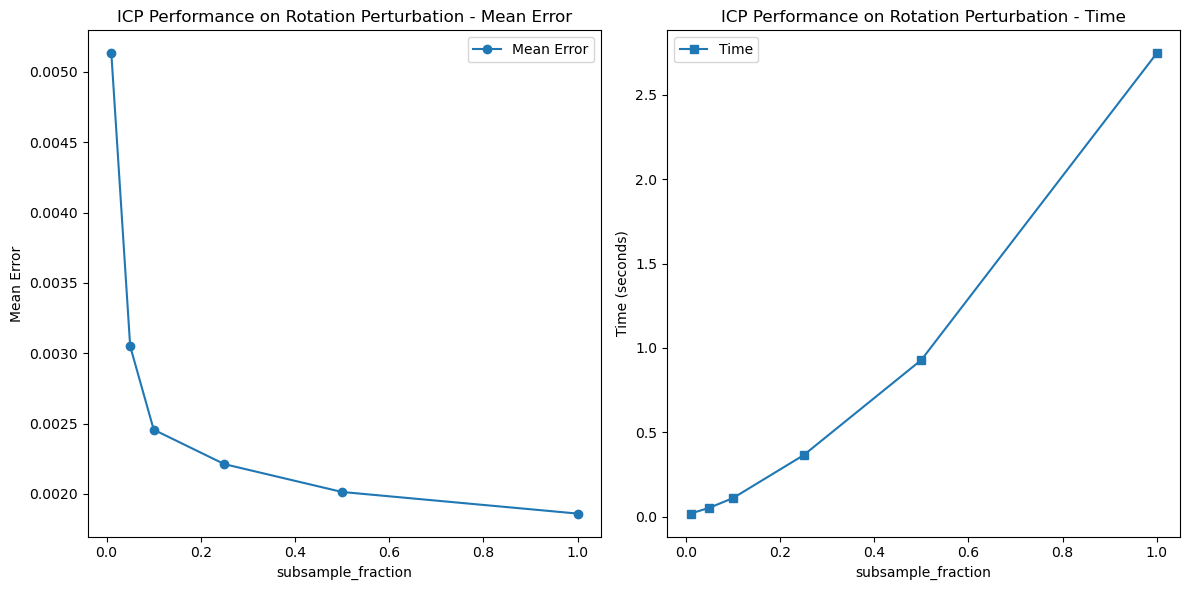

In [81]:
subsample_evaluated, mean_errors_subsample, iterations_subsample, times_subsample = zip(*subsample_data)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(subsample_fractions, mean_errors_subsample, 'o-', label='Mean Error')
plt.xlabel('subsample_fraction')
plt.ylabel('Mean Error')
plt.title('ICP Performance on Rotation Perturbation - Mean Error')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(subsample_fractions, times_subsample, 's-', label='Time')
plt.xlabel('subsample_fraction')
plt.ylabel('Time (seconds)')
plt.title('ICP Performance on Rotation Perturbation - Time')
plt.legend()

plt.tight_layout()
plt.show()

### 2.4

In [21]:
# 一些修补意见“
# 只保留距离小的点作为下次的，或者用单调栈记录最小的点作为下次对准的点
# 这里用特殊的icp，给距离近的点加大权重
# 这个icp本身就不能很好的支持00和90


def calculate_mean_error(A_mesh, B_mesh):
    # 提取顶点作为点云
    A_points = np.asarray(A_mesh.vertices)
    B_points = np.asarray(B_mesh.vertices)

    # 构建B点云的KD树
    tree = KDTree(B_points)
    # 查找最近点并计算距离
    distances, _ = tree.query(A_points)
    # 计算平均误差
    mean_error = np.mean(distances)
    return mean_error

mesh_filenames = ['bun000_v2.ply', 'bun045_v2.ply', 'bun090_v2.ply', 
                   'bun180_v2.ply', 'bun270_v2.ply','bun315_v2.ply']


meshes = []
for filename in mesh_filenames:
    mesh_path = os.path.join(RES_PATH, filename)
    assert os.path.exists(mesh_path), f'cannot find: {mesh_path}'
    mesh = o3d.io.read_triangle_mesh(mesh_path)
    meshes.append(mesh)

def multi_icp(meshes, max_iterations=100, tolerance=1e-6):
    base_mesh = meshes[0]  # 选择第一个网格作为基准
    merged_vertices = np.asarray(base_mesh.vertices)
    merged_triangles = np.asarray(base_mesh.triangles)

    remaining_meshes = meshes[1:]  # 剩余待合并的网格

    while remaining_meshes:
        errors = []
        for i, mesh_i in enumerate(remaining_meshes):
            src_points = np.asarray(mesh_i.vertices)
            # merged_vertices = random_subsampling(merged_vertices, 1 / 2)
            dst_points = np.asarray(merged_vertices)
            _, _, mean_error = icp(src_points.copy(), dst_points, max_iterations, tolerance)
            errors.append((i, mean_error))

        # 选择误差最小的网格进行合并
        min_error_idx, _ = min(errors, key=lambda x: x[1])
        print(min_error_idx)
        mesh_to_merge = remaining_meshes[min_error_idx]

        # 应用ICP算法合并网格
        src_points = np.asarray(mesh_to_merge.vertices)
        iterations, time_total, mean_error = icp(src_points, merged_vertices, max_iterations, tolerance)
        print(f" Iterations: {iterations}, time:{time_total}, mean_error:{mean_error}")
        visualize_iteration(src_points, merged_vertices)
        # 更新合并后的顶点和三角面数组
        offset = len(merged_vertices)
        merged_vertices = np.vstack((merged_vertices, src_points))
        merged_triangles = np.vstack((merged_triangles, np.asarray(mesh_to_merge.triangles) + offset))

        # 从待合并列表中移除已合并的网格
        del remaining_meshes[min_error_idx]

       

    # 创建新的合并后的网格
    merged_mesh = o3d.geometry.TriangleMesh()
    merged_mesh.vertices = o3d.utility.Vector3dVector(merged_vertices)
    merged_mesh.triangles = o3d.utility.Vector3iVector(merged_triangles)
    # 计算法线
    merged_mesh.compute_vertex_normals()
    return merged_mesh


# def multi_icp(meshes, max_iterations=100, tolerance=1e-5):
#     base_mesh = meshes[0]  # 选择第一个网格作为基准
#     merged_vertices = np.asarray(base_mesh.vertices)
#     merged_triangles = np.asarray(base_mesh.triangles)

#     # 这个完全可以每做完一次基准更新一次
#     errors = []
#     for i in range(1, len(meshes)):
#         src_points = np.asarray(meshes[i].vertices)
#         dst_points = np.asarray(base_mesh.vertices)
#         _, _, mean_error = icp(src_points.copy(), dst_points, max_iterations, tolerance)
#         errors.append((i, mean_error))

#     errors.sort(key=lambda x: x[1])

#     for i, _ in errors:
#         mesh_i = meshes[i]
#         points_i = np.asarray(mesh_i.vertices)
#         base_points = merged_vertices
#         # 应用ICP算法，这里需要您提供实际的ICP实现
#         iterations, time_total, mean_error = icp(points_i, base_points, max_iterations, tolerance)
#         print(f" Iterations: {iterations}, time:{time_total}, mean_error:{mean_error}")
#         visualize_iteration(base_points, points_i)
#         # 更新合并后的顶点和三角面数组
#         offset = len(merged_vertices)
#         merged_vertices = np.vstack((merged_vertices, points_i))
#         merged_triangles = np.vstack((merged_triangles, np.asarray(mesh_i.triangles) + offset))
        
#     # 创建新的合并后的网格
#     merged_mesh = o3d.geometry.TriangleMesh()
#     merged_mesh.vertices = o3d.utility.Vector3dVector(merged_vertices)
#     merged_mesh.triangles = o3d.utility.Vector3iVector(merged_triangles)
#     # 计算法线
#     merged_mesh.compute_vertex_normals()
    
#     return merged_mesh

# 执行多个ICP对齐
aligned_mesh = multi_icp(meshes)

# 可视化对齐后的网格
o3d.visualization.draw_geometries([aligned_mesh])

# 保存对齐后的网格
aligned_mesh_path = os.path.join(RES_PATH, 'aligned_mesh.ply')
o3d.io.write_triangle_mesh(aligned_mesh_path, aligned_mesh)

0
 Iterations: 18, time:18.55675506591797, mean_error:0.0016229282196280198


### 2.5

In [6]:
# 下面的可能要大改？ 点对面相比点到点好像是需要从一般的变成一个ls问题的
# 好像不需要大概，AA_weighted.T @ BB这个相当于给的那个式子？
# 欸这个解释不清我都没办法做报告

RES_PATH = 'bunny_v2'  # 请替换为实际路径

mesh_src = os.path.join(RES_PATH, 'bun000_v2.ply')
assert os.path.exists(mesh_src), 'cannot found:' + mesh_src
mesh1 = o3d.io.read_triangle_mesh(mesh_src)

mesh_dst = os.path.join(RES_PATH, 'bun045_v2.ply')
assert os.path.exists(mesh_dst), 'cannot found:' + mesh_dst
mesh2 = o3d.io.read_triangle_mesh(mesh_dst)

points_A = np.asarray(mesh1.vertices)
points_B = np.asarray(mesh2.vertices)

# 如果网格没有法线，我们可以计算它们
if not mesh1.has_vertex_normals():
    mesh1.compute_vertex_normals()
if not mesh2.has_vertex_normals():
    mesh2.compute_vertex_normals()

# 确保您已经有了网格的法线信息
normals_A = np.asarray(mesh1.vertex_normals)
normals_B = np.asarray(mesh2.vertex_normals)


# 下面是在解决ls最小二乘问题？
# 最小二乘问题： 感觉最小化它给的那个东西都可以叫做在解决这个问题
def best_fit_transform_normal(A, B, normals, weights=None):
    # 因为normal包含在weights里了所以我感觉不需要在这里算？
    assert len(A) == len(B)
    if weights is None:
        weights = np.ones(len(A))
    centroid_A = np.average(A, axis=0, weights=weights)
    centroid_B = np.average(B, axis=0, weights=weights)
    AA = A - centroid_A
    BB = B - centroid_B

    # 直接应用权重，避免创建大的对角矩阵
    AA_weighted = AA * weights[:, np.newaxis]
    H = AA_weighted.T @ BB
    U, S, Vt = np.linalg.svd(H)
    R = Vt.T @ U.T
    if np.linalg.det(R) < 0:
        Vt[2, :] *= -1
        R = Vt.T @ U.T
    t = centroid_B.T - R @ centroid_A.T
    t = t.reshape(-1, 1)
    return R, t


# 接下来，我们需要修改 icp 函数
def icp_normal(src_cp, dst_cp, normals, max_iterations=100, tolerance=1e-4, close_thrshold =1e-4):
    start_time = time.time()
    src = np.copy(src_cp)
    dst = np.copy(dst_cp)
    prev_error = np.inf
    tree = KDTree(dst)

    for i in range(max_iterations):
        # 寻找最近点
        distances, indices = tree.query(src, k=1)
        closest_normals = normals[indices]

        # 计算点到平面的距离【这个就是pdf里那个新的公式，我需要最小化这个】
        point_plane_distances = np.abs((src - dst[indices.flatten()]) * closest_normals).sum(axis=1)
        # woc，我这里本来填的是1 / 。。。，我还以为做的是对的，但是没这个对
        # 感觉改成这样就相当于最小二乘法了？
        weights = (point_plane_distances + 1e-6)

        # 使用新的距离和权重进行变换
        T = best_fit_transform_normal(src, dst[indices], closest_normals, weights=weights)
        src = (T[0] @ src.T + T[1]).T
        
        mean_error = np.mean(point_plane_distances)
        if np.abs(prev_error - mean_error) < tolerance:
            break
        prev_error = mean_error
        # visualize_iteration(src, dst)

    # 最终的变换需要使用原始的点集A
    T_final = best_fit_transform_normal(src_cp, src, normals[indices], weights=weights)
    total_time = time.time() - start_time
    return T_final[0], T_final[1], i, total_time, mean_error

# 然后调用icp函数
R, t, iterations, time_total, mean_error = icp_normal(points_B, points_A, normals_A)
print(f" Iterations: {iterations}, time:{time_total}, mean_error:{mean_error}")

# 应用ICP变换到第二个网格
mesh2.transform(np.vstack((np.hstack((R, t)), [0, 0, 0, 1])))
visualize_iteration(points_A, points_B)

# 可视化对齐后的网格
o3d.visualization.draw_geometries([mesh1, mesh2])
aligned_mesh_path = os.path.join(RES_PATH, 'bun045_v2_aligned.ply')
combined_mesh = mesh1 + mesh2  # 合并网格
o3d.io.write_triangle_mesh(aligned_mesh_path, combined_mesh)  # 保存合并后的网格

 Iterations: 8, time:2.5768539905548096, mean_error:0.0013646857871650866


True

上面收敛的更快了，但是我之前觉得icp加了权重也收敛的很快，现在想可能是因为这个权重有的时候好用有的时候不好用，但是这个永远都好用

In [7]:
RES_PATH = 'bunny_v2'  # 请替换为实际路径

mesh_dst = os.path.join(RES_PATH, 'bun000_v2.ply')
assert os.path.exists(mesh_dst), 'cannot found:' + mesh_dst
mesh1 = o3d.io.read_triangle_mesh(mesh_dst)

mesh_src = os.path.join(RES_PATH, 'bun045_v2.ply')
assert os.path.exists(mesh_src), 'cannot found:' + mesh_src
mesh2 = o3d.io.read_triangle_mesh(mesh_src)

points_A = np.asarray(mesh1.vertices)
points_B = np.asarray(mesh2.vertices)

# 如果网格没有法线，我们可以计算它们
if not mesh1.has_vertex_normals():
    mesh1.compute_vertex_normals()
if not mesh2.has_vertex_normals():
    mesh2.compute_vertex_normals()

# 确保您已经有了网格的法线信息
normals_A = np.asarray(mesh1.vertex_normals)
normals_B = np.asarray(mesh2.vertex_normals)


import numpy as np
from scipy.spatial import KDTree
from scipy.spatial.transform import Rotation
import time
import open3d as o3d

# 你提供的solve_least_squares函数似乎是正确的，不需要修改
def solve_least_squares(A, b):
    U, S, VT = np.linalg.svd(A, full_matrices=False)
    S_inv = np.diag(1.0 / S)
    x = VT.T @ S_inv @ U.T @ b
    return x

def best_fit_transform_p2p(src, dst, dst_normals):
    # 构建线性系统
        A_matrix = np.empty((len(src), 6))
        b_vector = np.empty(len(src))
        for idx, (s, d, n) in enumerate(zip(src, dst, dst_normals)):
            cross = np.cross(s, n)
            A_matrix[idx] = [cross[0], cross[1], cross[2], n[0], n[1], n[2]]
            b_vector[idx] = -(s - d).T @ n

        # 使用SVD解最小二乘问题
        params = solve_least_squares(A_matrix, b_vector)

        # alpha, beta, gamma = params[:3]
        # S = np.array([[0, -gamma, beta],
        #             [gamma, 0, -alpha],
        #             [-beta, alpha, 0]])
        # R = np.eye(3) + S  # 近似旋转矩阵

        rotation_vector = params[:3]
        # 使用旋转向量构造旋转矩阵
        rotation = Rotation.from_rotvec(rotation_vector)
        R = rotation.as_matrix()  # 获取旋转矩阵
        t = params[3:6]
        
        return R, t

# 修改后的point_to_plane_icp_with_svd函数
def point_to_plane_icp_with_svd(src, dst, dst_normals, max_iterations = 100, tolerance=1e-4):
    start_time = time.time()
    prev_error = np.inf
    tree = KDTree(dst)
    
    for i in range(max_iterations):
        distances, indices = tree.query(src, k=1)
        R, t = best_fit_transform_p2p(src, dst[indices], dst_normals[indices])
        
        # 更新源点云
        # 使用np.dot进行就地旋转，然后就地添加平移
        np.dot(src, R.T, out=src)  # 就地旋转src
        src += t[:, np.newaxis].T  # 就地添加平移
        
        # 检查收敛
        mean_error = np.mean(distances)
        if np.abs(prev_error - mean_error) < tolerance:
            break
        prev_error = mean_error
        visualize_iteration(src, dst)

    time_total = time.time() - start_time
    return i, time_total, mean_error  # i+1表示实际迭代次数

# 然后调用icp函数
iterations, time_total, mean_error = point_to_plane_icp_with_svd(points_B, points_A, normals_A)
print(f" Iterations: {iterations}, time:{time_total}, mean_error:{mean_error}")

# 应用ICP变换到第二个网格
mesh2.transform(np.vstack((np.hstack((R, t)), [0, 0, 0, 1])))
visualize_iteration(points_A, points_B)

# 可视化对齐后的网格
o3d.visualization.draw_geometries([mesh1, mesh2])
aligned_mesh_path = os.path.join(RES_PATH, 'bun045_v2_aligned.ply')
combined_mesh = mesh1 + mesh2  # 合并网格
o3d.io.write_triangle_mesh(aligned_mesh_path, combined_mesh)  # 保存合并后的网格

 Iterations: 6, time:28.439247608184814, mean_error:0.0008187184719548691


True

这里把tolerence调大可能会更明显地看到收敛快了？